In [1]:
# import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Unbalanced 2022 Logistic Regression Model

In [2]:
# read the heart_2022_encoded.csv file
heart_2022_cleaned = pd.read_csv('heart_2022_cleaned.csv')
# display the first 5 rows of the dataframe
print(heart_2022_cleaned.head())


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  27.99     Yes              No     No             4.0   
1           No  30.13     Yes              No     No             0.0   
2           No  31.66     Yes             Yes     No             0.0   
3           No  31.32      No              No     No             5.0   
4           No  33.07      No              No     No             3.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0           0.0          No  Female        65-69  White       No   
1           0.0          No    Male        70-74  White      Yes   
2           0.0         Yes    Male        75-79  White       No   
3           0.0         Yes  Female  80 or older  White       No   
4          15.0          No  Female  80 or older  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        9.0     No            No         No  
1       

In [3]:
# Separate the dataset into two subsets based on the HeartDisease_Yes and HeartDisease_No columns
#heart_disease_yes = heart_2022_cleaned[heart_2022_cleaned['HeartDisease'] == 'Yes']
#heart_disease_no = heart_2022_cleaned[heart_2022_cleaned['HeartDisease'] == 'No']

In [4]:
# Balance the dataset by sampling an equal number of cases from each subset
# Determine the number of samples to match based on the smaller subset
#min_count = min(len(heart_disease_yes), len(heart_disease_no))
# Display the number of samples to match
#min_count


In [5]:
# Sample from each subset
#balanced_2022_heart_disease_yes = heart_disease_yes.sample(n=min_count, random_state=42)
#balanced_2022_heart_disease_no = heart_disease_no.sample(n=min_count, random_state=42)


In [6]:
# Combine the balanced subsets and reset the index
#balanced_2022_dataset = pd.concat([balanced_2022_heart_disease_yes, balanced_2022_heart_disease_no]).reset_index(drop=True)
# Display the first 5 rows of the balanced dataset
#balanced_2022_dataset.head()

In [7]:
# Split the cleaned dataset into training and testing sets
train_set, test_set = train_test_split(heart_2022_cleaned, test_size=0.2, random_state=42)


In [8]:
# Display the size of the training and testing sets
len(train_set), len(test_set)

(196817, 49205)

In [9]:
# Encode non-numeric columns using one-hot encoding
encoded_dataset = pd.get_dummies(train_set, drop_first=True)  # Using drop_first to avoid dummy variable trap

# Display the first few rows of the encoded dataset to verify the transformation
encoded_dataset.head(), encoded_dataset.shape


(          BMI  PhysicalHealth  MentalHealth  SleepTime  HeartDisease_Yes  \
 108769  28.13             0.0           0.0        6.0             False   
 240750  25.79             0.0           0.0        7.0             False   
 100329  23.03             3.0           0.0        9.0             False   
 132628  23.49             4.0           6.0        6.0             False   
 72101   29.84             0.0           2.0        7.0             False   
 
         Smoking_Yes  AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  \
 108769         True                False       False            False   
 240750         True                 True       False            False   
 100329        False                False       False            False   
 132628        False                 True       False            False   
 72101         False                 True       False            False   
 
         Sex_Male  ...  Diabetic_Yes  Diabetic_Yes (during pregnancy)  \
 108769      True

In [10]:
# Define the order for age categories based on the dataset's unique values
age_category_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                      '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

# Map the age categories to ordinal values
age_category_mapping = {category: index for index, category in enumerate(age_category_order)}
train_set['AgeCategoryOrdinal'] = train_set['AgeCategory'].map(age_category_mapping)

# Drop the original 'AgeCategory' column
train_set_ordinal = train_set.drop('AgeCategory', axis=1)

# Reapply one-hot encoding to the remaining non-numeric columns, excluding 'AgeCategory'
encoded_dataset_with_ordinal_age = pd.get_dummies(train_set_ordinal, drop_first=True)

# Display the first few rows of the dataset to verify the transformation
display(encoded_dataset_with_ordinal_age.head())
display(encoded_dataset_with_ordinal_age.shape)

,BMI,PhysicalHealth,MentalHealth,SleepTime,AgeCategoryOrdinal,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
108769,28.13,0.0,0.0,6.0,4,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
240750,25.79,0.0,0.0,7.0,6,False,True,True,False,False,...,False,False,True,False,False,False,False,False,False,False
100329,23.03,3.0,0.0,9.0,12,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
132628,23.49,4.0,6.0,6.0,10,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
72101,29.84,0.0,2.0,7.0,7,False,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False


(196817, 25)

# Logistic Regression

In [11]:
# separate the features and the target variable
X = encoded_dataset_with_ordinal_age.drop('HeartDisease_Yes', axis=1)
y = encoded_dataset_with_ordinal_age['HeartDisease_Yes']

In [12]:
# Apply the one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

In [13]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=1)

In [14]:
# standardize the dataset
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# define the logistic regression model
logistic_model = LogisticRegression()

In [16]:
# fit the model
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
# Train a Logistic Regression model and print the model score
classifier = LogisticRegression(solver= 'lbfgs', random_state=1)
classifier.fit(X_train_scaled, y_train)
print(f'Training Score: {classifier.score(X_train_scaled, y_train)}')

Training Score: 0.9448851403275899


In [18]:
# Make and save testing predictions with the saved logistic regression model using the test data
predictions = classifier.predict(X_test_scaled)
# Review the predictions
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [19]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
accuracy_score(y_test, predictions)

0.9457626257494157

In [20]:
# view the confusion matrix
predictions = logistic_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.9457626257494157
Confusion Matrix:
 [[37129    97]
 [ 2038   100]]


In [21]:
# view the false positive and false negative rates
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"False Positive Rate : {fp}")
print(f"False Negative Rate : {fn}")


False Positive Rate : 97
False Negative Rate : 2038


In [22]:
# view the true positive and true negative accuracy rates
print(f"True Positive Rate : {tp}")
print(f"True Negative Rate : {tn}")

True Positive Rate : 100
True Negative Rate : 37129


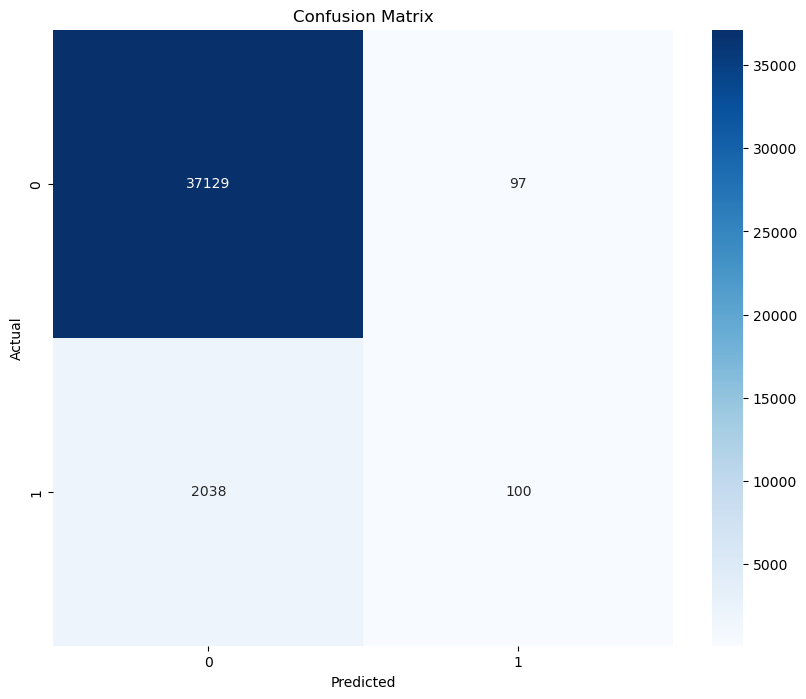

In [23]:
# View a heatmap of the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.95      1.00      0.97     37226
        True       0.51      0.05      0.09      2138

    accuracy                           0.95     39364
   macro avg       0.73      0.52      0.53     39364
weighted avg       0.92      0.95      0.92     39364



In [25]:
# Show the model's accuracy, precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print(f'Accuracy: {accuracy_score(y_test, predictions)}')
print(f'Precision: {precision_score(y_test, predictions)}')
print(f'Recall: {recall_score(y_test, predictions)}')
print(f'F1 Score: {f1_score(y_test, predictions)}')

Accuracy: 0.9457626257494157
Precision: 0.5076142131979695
Recall: 0.04677268475210477
F1 Score: 0.08565310492505354


In [26]:
# view the feature weights
feature_importance = classifier.coef_[0]
print(feature_importance)

[ 0.02724246  0.01962829  0.04737239 -0.03835238  0.86853223  0.21363977
 -0.10615006  0.21503344  0.06450917  0.4013917   0.04799325  0.10141117
  0.11734155  0.02159779  0.15450022  0.03411512 -0.01807858  0.48279903
  0.46443946  0.34383582  0.23276782  0.06038829  0.07609186 -0.00754375]


In [27]:
# Define the feature names
feature_names = X.columns.tolist()

# View the two largest and two smallest feature weights for true positive predictions
weights = logistic_model.coef_[0]
pairs = list(zip(weights, feature_names))
pairs.sort(key=lambda x: x[0])
print("Largest weights for true positive predictions:")
for pair in pairs[-2:]:
    print(pair)
print("\nSmallest weights for true positive predictions:")
for pair in pairs[:2]:
    print(pair)

Largest weights for true positive predictions:
(0.4827990261808746, 'GenHealth_Fair')
(0.8685322252444635, 'AgeCategoryOrdinal')

Smallest weights for true positive predictions:
(-0.10615006226024463, 'AlcoholDrinking_Yes')
(-0.038352380292488254, 'SleepTime')


# Model Analysis
